# Twitter stock Prediction

## About Dataset

DataSet is taken from Kaggle - https://www.kaggle.com/datasets/maharshipandya/twitter-stocks-dataset?select=twitter-stocks.csv
This is a dataset of Twitter stock prices over a range of 9 years. The stock prices' date ranges from November 2013 to October 2022. The data is in CSV format which is tabular and can be loaded quickly.

## Column Description
There are 7 columns in this dataset.

Note: The currency is in USD ($)

- **Date**: The date for which the stock data is considered.
- **Open**: The stock's opening price on that day.
- **High**: The stock's highest price on that day.
- **Low**: The stock's lowest price on that day.
- **Close**: The stock's closing price on that day. The close price is adjusted for splits.
- **Adj Close**: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.
- **Volume**: Volume measures the number of shares traded in a stock or contracts traded in futures or options.

# Import the Modules

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [11]:
import keras.backend as K

# Clear the Keras session
K.clear_session()

# Load the Dataset

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/rachanabv07/Twitter-Stock-Prediction/main/twitter-stocks.csv')

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0


# Explore Twitter Data

In [21]:
df.shape

(2259, 7)

In [22]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
std,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07
min,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2259 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.7+ KB


In [25]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Cleaning

In [26]:
#converting Date(object) to Date(datetime64[ns])  
df['Date']= pd.to_datetime(df['Date'])

In [27]:
df["year"] = df["Date"].dt.year

In [28]:
print(df.Date.dtype)

datetime64[ns]


In [29]:
df = df.set_index("Date")

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0,2013
2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0,2013
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0,2013
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0,2013
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0,2013


In [31]:
#Setting the Frequency to Business Days

print(df.shape)

(2259, 7)


In [32]:
Data = df.asfreq("b")

In [33]:
print(Data.shape)

(2341, 7)


In [34]:
Data.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0,2013.0
2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0,2013.0
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0,2013.0
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0,2013.0
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0,2013.0


In [35]:
Data.isnull().sum()

Open         82
High         82
Low          82
Close        82
Adj Close    82
Volume       82
year         82
dtype: int64

In [36]:
#Getting the Dates of Missing Values
null_data = Data[Data.isnull().any(axis=1) ]

In [37]:
null_data.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2013-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
null_dates = null_data.index.tolist()

In [39]:
null_dates

[Timestamp('2013-11-28 00:00:00'),
 Timestamp('2013-12-25 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-01-20 00:00:00'),
 Timestamp('2014-02-17 00:00:00'),
 Timestamp('2014-04-18 00:00:00'),
 Timestamp('2014-05-26 00:00:00'),
 Timestamp('2014-07-04 00:00:00'),
 Timestamp('2014-09-01 00:00:00'),
 Timestamp('2014-11-27 00:00:00'),
 Timestamp('2014-12-25 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-01-19 00:00:00'),
 Timestamp('2015-02-16 00:00:00'),
 Timestamp('2015-04-03 00:00:00'),
 Timestamp('2015-05-25 00:00:00'),
 Timestamp('2015-07-03 00:00:00'),
 Timestamp('2015-09-07 00:00:00'),
 Timestamp('2015-11-26 00:00:00'),
 Timestamp('2015-12-25 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-01-18 00:00:00'),
 Timestamp('2016-02-15 00:00:00'),
 Timestamp('2016-03-25 00:00:00'),
 Timestamp('2016-05-30 00:00:00'),
 Timestamp('2016-07-04 00:00:00'),
 Timestamp('2016-09-05 00:00:00'),
 Timestamp('2016-11-24 00:00:00'),
 Timestamp('2016-12-

In [40]:
# Filtering out the Holidays

import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25), datetime.date(2017,4, 14), datetime.date(2018,3, 30), datetime.date(2019,4, 19), datetime.date(2020,4, 10), datetime.date(2021,4, 2), datetime.date(2022,4, 15) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2018-12-05 00:00:00'), Timestamp('2022-06-20 00:00:00')]


In [41]:
modified_df = Data.drop(holidays)
print(modified_df.shape)

(2261, 7)


In [42]:
print("Before filling missing values:\n", modified_df.isnull().sum())

Before filling missing values:
 Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
year         2
dtype: int64


In [43]:
modified_df = modified_df.bfill(axis ='rows')

In [44]:
print("\nAfter filling missing values:\n",modified_df.isna().sum())


After filling missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
dtype: int64


In [45]:
modified_df.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0,2013.0
2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0,2013.0
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0,2013.0
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0,2013.0
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0,2013.0


# Data Visualizing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6852893d30>,
      dtype=object)

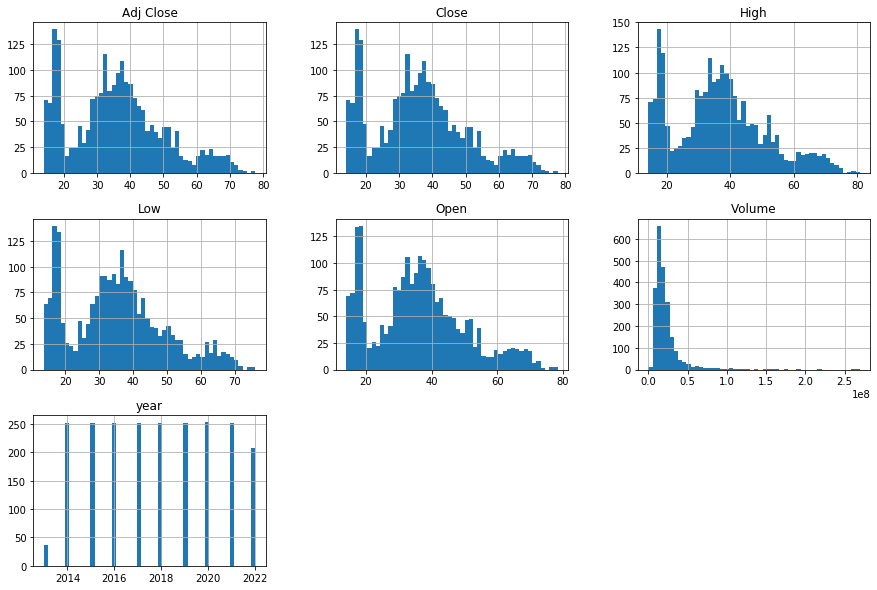

In [46]:
modified_df.hist(bins = 50, figsize = (15,10))

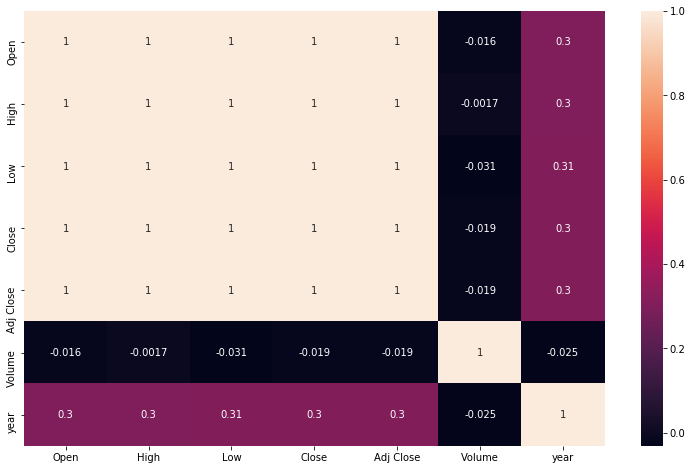

In [47]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True)

In [48]:
modified_df.drop('Adj Close',axis=1,inplace=True)

In [49]:
modified_df

,Open,High,Low,Close,Volume,year
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,117701670.0,2013.0
2013-11-08,45.930000,46.939999,40.685001,41.650002,27925307.0,2013.0
2013-11-11,40.500000,43.000000,39.400002,42.900002,16113941.0,2013.0
2013-11-12,43.660000,43.779999,41.830002,41.900002,6316755.0,2013.0
2013-11-13,41.029999,42.869999,40.759998,42.599998,8688325.0,2013.0
...,...,...,...,...,...,...
2022-10-21,50.000000,50.750000,49.549999,49.889999,51209029.0,2022.0
2022-10-24,50.709999,51.860001,50.520000,51.520000,22987553.0,2022.0
2022-10-25,52.415001,53.180000,52.200001,52.779999,35077848.0,2022.0


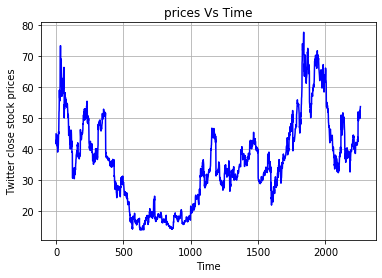

In [50]:
def plotter():
    global closing_stock
    
    company_close = modified_df.Close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel("Twitter close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter()

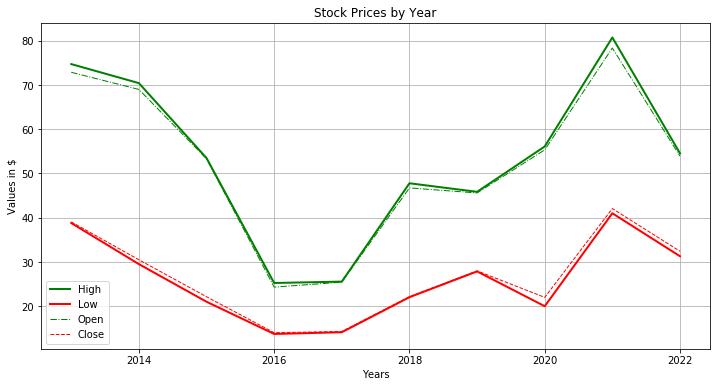

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(
    modified_df.groupby("year")["High"].max(),
    color="green",
    linewidth=2,
    label="High",
)
plt.plot(
    modified_df.groupby("year")["Low"].min(),
    color="red",
    linewidth=2,
    label="Low",
)
plt.plot(
    modified_df.groupby("year")["Open"].max(),
    color="green",
    linestyle="-.",
    linewidth=1,
    label="Open",
)
plt.plot(
    modified_df.groupby("year")["Close"].min(),
    color="red",
    linestyle="--",
    linewidth=1,
    label="Close",
)

plt.xlabel("Years")
plt.ylabel("Values in $")
plt.title("Stock Prices by Year")
plt.legend()
plt.grid(True)
plt.show()

### **Splitting the Data**

In [52]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 1808 Validation Samples: 226 Test Samples: 227


In [53]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(1808, 1)


In [54]:
val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

(226, 1)


In [55]:
test_data = closing_stock[n_train+n_val:]

print(test_data.shape)

(227, 1)


### Feature Scaling

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [57]:
train = scaler.fit_transform(train_data)

In [58]:
val = scaler.transform(val_data)

In [59]:
test = scaler.transform(test_data)

### Create the Datasets

In [60]:
train

array([[0.5209107 ],
       [0.46610457],
       [0.48718387],
       ...,
       [0.6318719 ],
       [0.5762226 ],
       [0.5569984 ]], dtype=float32)

In [61]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [62]:
n_features = 2
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [63]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1805, 2) (1805,) (223, 2) (223,) (224, 2) (224,)


In [64]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [65]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1805, 1, 2) (1805,) (223, 1, 2) (223,) (224, 1, 2) (224,)


# Build the Model

In [66]:
model = keras.models.Sequential()

In [67]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [68]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [69]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [70]:
history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Epoch 1/100
15/15 [==============================] - 7s 90ms/step - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.1582 - val_mean_squared_error: 0.1582
Epoch 2/100
15/15 [==============================] - 0s 13ms/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 3/100
15/15 [==============================] - 0s 13ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 4/100
15/15 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/100
15/15 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/100
15/15 [==============================] - 0s 13ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 7/100
15/15 [=========

# Evaluate the Model

In [71]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00044 , RMSE: 0.02
Validation Score:
MSE: 0.00101 , RMSE: 0.03
Test Score:
MSE: 0.00064 , RMSE: 0.03


# Visualizing Loss vs Epochs

In [72]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


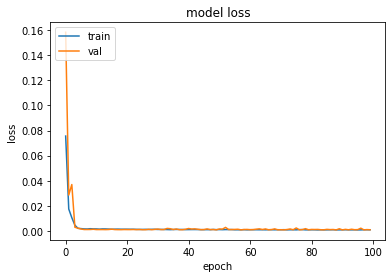

In [73]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [74]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
print(pred[:10])

[[44.536747]
 [45.667217]
 [46.4326  ]
 [45.685207]
 [44.750862]
 [44.44846 ]
 [44.176468]
 [43.308117]
 [43.177307]
 [43.091366]]


In [75]:
testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[45.72]
 [46.46]
 [45.56]
 [44.6 ]
 [44.35]
 [44.07]
 [43.13]
 [43.07]
 [42.98]
 [44.36]]


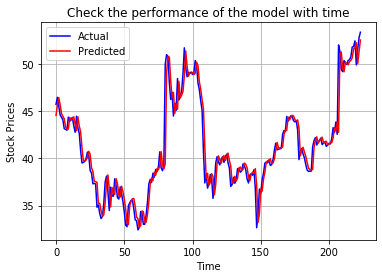

In [76]:
plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()